In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Activation, Input
from tensorflow.keras.optimizers import SGD;

import sys

MY_UTILS_PATH = 'Modules/'
if not MY_UTILS_PATH in sys.path:
  sys.path.append(MY_UTILS_PATH)

import dataset_utils

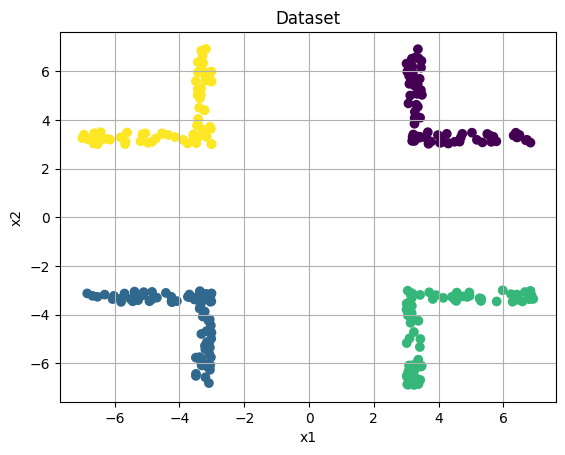

In [ ]:
nsamples = 300

data = dataset_utils.corners(N = nsamples,scale=0.5, gapwidth=3, cornerwidth=4)

Y = data[:,-1].astype(int)
X = data[:,:-1]

k = np.unique(Y).size

colors = np.array(['r','y','b','g'])

#displaying the dataset
plt.scatter(X[:,0],X[:,1],c=Y)
plt.xlabel("x1")
plt.ylabel("x2")
plt.grid()
plt.title("Dataset")
plt.show()

In [ ]:
# First we will shuffle the samples
indexes = np.arange(X.shape[0])
np.random.shuffle(indexes)
X = X[indexes,:]
Y = Y[indexes]

# Then, we split our data into train/val/test sets
#train_split = np.int(0.5*Y.size)
#val_split = np.int(0.75*Y.size)
train_split = int(0.5*Y.size)
val_split = int(0.75*Y.size)

X_train = X[:train_split,:]
Y_train = Y[:train_split]

X_val = X[train_split:val_split,:]
Y_val = Y[train_split:val_split]

X_test = X[val_split:,:]
Y_test = Y[val_split:]

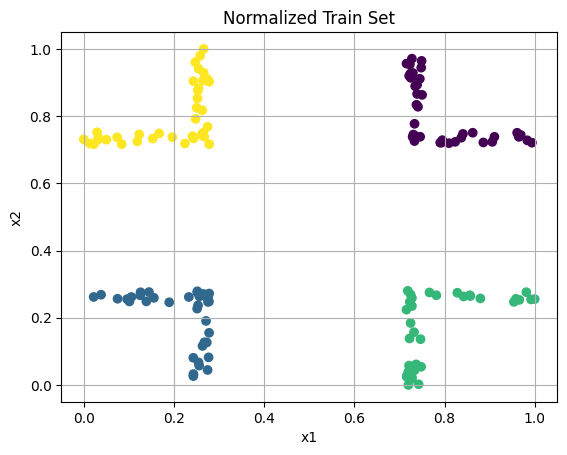

In [ ]:
# min-max data normalization
x_train_min = X_train.min(axis = 0, keepdims = True)
x_train_max = X_train.max(axis = 0, keepdims = True)

X_train = (X_train - x_train_min)/(x_train_max - x_train_min)
X_val = (X_val - x_train_min)/(x_train_max - x_train_min)
X_test = (X_test - x_train_min)/(x_train_max - x_train_min)


#####################################################################################
#Activity suggestion:
# Change the min-max normalization above by standardization ((X - mean)/(std))
####################################################################################


#Displaying the normalized train set
plt.scatter(X_train[:,0],X_train[:,1],c=Y_train)
plt.xlabel("x1")
plt.ylabel("x2")
plt.grid()
plt.title("Normalized Train Set")
plt.show()

In [ ]:
Y_oh_train = to_categorical(Y_train, k)
Y_oh_val = to_categorical(Y_val, k)
Y_oh_test = to_categorical(Y_test, k)
# Displaying the 5 first elemnts
print('Y_train[:5]:')
print(Y_train[:5])
print('\nY_oh_train[:5]=')
print(Y_oh_train[:5])

Y_train[:5]:
[0 2 1 1 1]

Y_oh_train[:5]=
[[1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]]


In [ ]:
def my_model(k,learning_rate = 0.15):
    inputs = Input(shape=(2,))
    out1 = Dense(k, activation='softmax')(inputs)
    model = Model(inputs=inputs, outputs=out1)
    sgd = SGD(lr=learning_rate)
    model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics = ["accuracy"])
    return model

In [ ]:
model = my_model(k)
print(model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 2)]               0         
                                                                 
 dense (Dense)               (None, 4)                 12        
                                                                 
Total params: 12 (48.00 Byte)
Trainable params: 12 (48.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [ ]:
batch_size = train_split
nb_epoch = 100
n = X_train.shape[0] # number of training examples
history = model.fit(X_train, Y_oh_train, validation_data=(X_val,Y_oh_val), \
                    batch_size=batch_size, epochs=nb_epoch,verbose=1)

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 1.5221 - accuracy: 0.2297 - val_loss: 1.4684 - val_accuracy: 0.2568
Epoch 2/100
1/1 [==============================] - 0s 70ms/step - loss: 1.5209 - accuracy: 0.2297 - val_loss: 1.4673 - val_accuracy: 0.2568
Epoch 3/100
1/1 [==============================] - 0s 93ms/step - loss: 1.5196 - accuracy: 0.2297 - val_loss: 1.4662 - val_accuracy: 0.2568
Epoch 4/100
1/1 [==============================] - 0s 113ms/step - loss: 1.5184 - accuracy: 0.2297 - val_loss: 1.4651 - val_accuracy: 0.2568
Epoch 5/100
1/1 [==============================] - 0s 77ms/step - loss: 1.5171 - accuracy: 0.2297 - val_loss: 1.4640 - val_accuracy: 0.2568
Epoch 6/100
1/1 [==============================] - 0s 72ms/step - loss: 1.5159 - accuracy: 0.2297 - val_loss: 1.4630 - val_accuracy: 0.2568
Epoch 7/100
1/1 [==============================] - 0s 99ms/step - loss: 1.5147 - accuracy: 0.2297 - val_loss: 1.4619 - val_accuracy: 0.2568
Epoch 8/100
1/1 [====

Final loss (cross-entropy and accuracy): [1.4256936311721802, 0.2567567527294159]

Layer 0
Bias:
 [ 0.00815124  0.09263179 -0.14640146  0.04561844]
W:
 [[ 0.04680511  0.4753661   0.80125135  0.5826358 ]
 [ 0.7920186  -0.8545546   0.8193535  -0.1863234 ]]



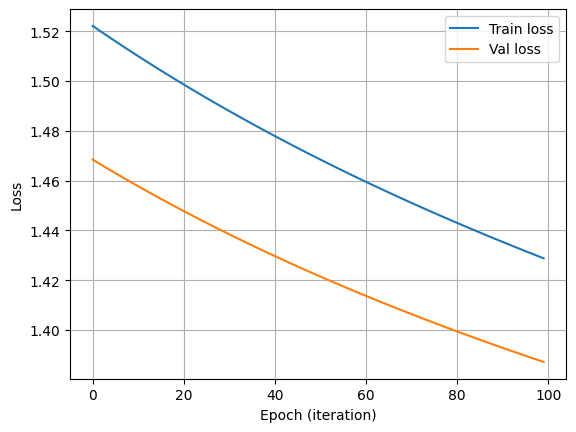

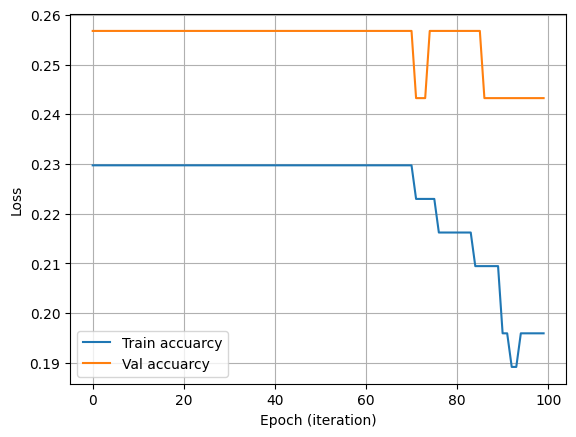

In [ ]:
loss = model.evaluate(X_test, Y_oh_test, verbose=0)
print('Final loss (cross-entropy and accuracy):',loss)
print()
W = model.get_weights()
for ii in range(len(W)//2):
    print("Layer %d" %ii)
    print('Bias:\n', W[2*ii + 1])
    print('W:\n', W[2*ii])
    print()

plt.plot(history.history['loss'], label = "Train loss")
plt.plot(history.history['val_loss'], label = "Val loss")
plt.xlabel("Epoch (iteration)")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()


plt.plot(history.history['accuracy'], label = "Train accuarcy")
plt.plot(history.history['val_accuracy'], label = "Val accuarcy")
plt.xlabel("Epoch (iteration)")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()

117/117 [==============================] - 0s 1ms/step


<ipython-input-23-a1802a99c653>:18: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_train[:,0], X_train[:,1], c=colors[Y_train], edgecolors='k', cmap=plt.cm.Paired)


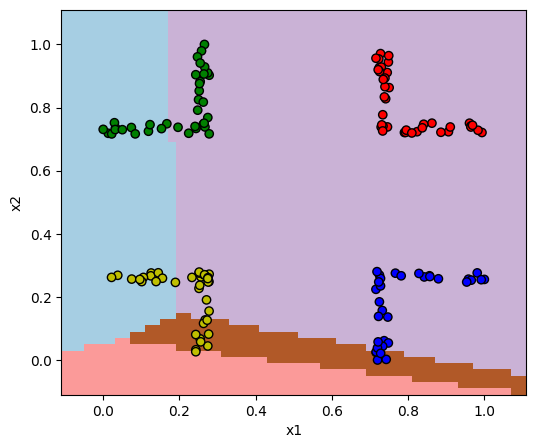

In [23]:
h = .02  # step size in the mesh
slack = 0.1
# Calculates the grid for the attribute space

x_min, x_max = X_train.min(axis=0) - slack, X_train.max(axis=0) + slack
xx, yy = np.meshgrid(np.arange(x_min[0], x_max[0], h), np.arange(x_min[1], x_max[1], h))
X_grid = np.c_[xx.ravel(), yy.ravel()]

# Prediction of all samples in our grid
Z = model.predict(X_grid).argmax(axis = 1)
Z = Z.reshape(xx.shape)

# Display decision boundary
plt.figure(1, figsize=(6, 5))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Display training samples
plt.scatter(X_train[:,0], X_train[:,1], c=colors[Y_train], edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()